<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/LSTM_non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,GRU,LSTM,Dense,Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

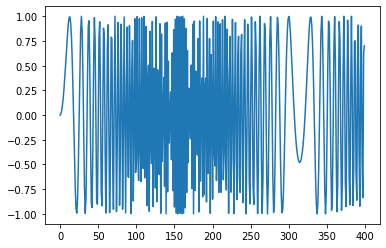

In [4]:
series=np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.show()

In [5]:
T=10
D=1
X=[]
Y=  []
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (390, 10, 1) Y.shape (390,)


Linear model

In [6]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 31ms/step - loss: 1.4988 - val_loss: 0.9057
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 1.3018 - val_loss: 0.7859
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 1.1419 - val_loss: 0.6969
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 1.0128 - val_loss: 0.6215
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.9095 - val_loss: 0.5686
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.8272 - val_loss: 0.5310
Epoch 7/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7582 - val_loss: 0.4981
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7023 - val_loss: 0.4792
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6600 - val_loss: 0.4693
Epoch 10/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6217 - val_loss: 0.4639
Epoch 11/80
7/7 [==============================] 

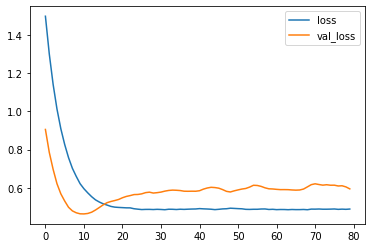

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


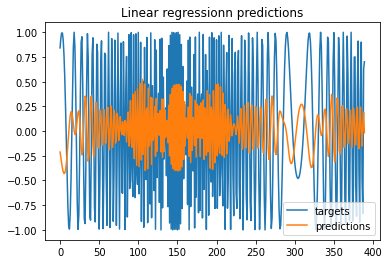

In [8]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title('Linear regressionn predictions')
plt.legend()
plt.show()

In [9]:
validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while len(validation_predictions)<len(validation_target):
   p=model.predict(last_x.reshape(1,-1))[0,0]
   validation_predictions.append(p)
   
   #
   last_x=np.roll(last_x,-1)
   last_x[-1]=p

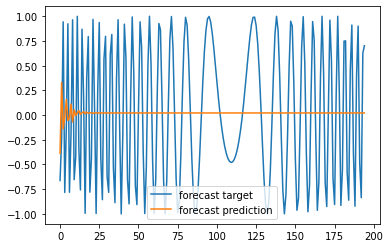

In [10]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()


RNN

In [14]:
X=X.reshape(-1,T,1)

i=Input(shape=(T,D))
x=SimpleRNN(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=200,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 41ms/step - loss: 0.7055 - val_loss: 0.4782
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5228 - val_loss: 0.5126
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4760 - val_loss: 0.5771
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4466 - val_loss: 0.5818
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4392 - val_loss: 0.5798
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4456 - val_loss: 0.5527
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4199 - val_loss: 0.5660
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4033 - val_loss: 0.5690
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3935 - val_loss: 0.5561
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3853 - val_loss: 0.5153
Epoch 11/200
7/7 [================

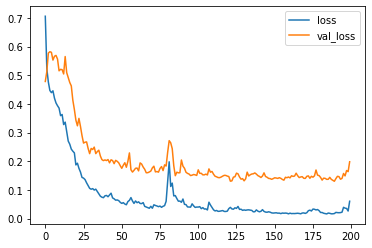

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


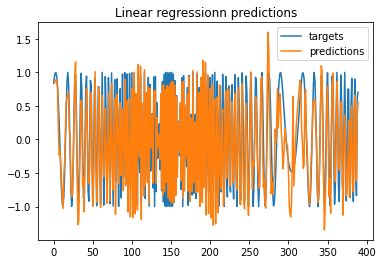

In [18]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title('Linear regressionn predictions')
plt.legend()
plt.show()

In [16]:
validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while len(validation_predictions)<len(validation_target):
   p=model.predict(last_x.reshape(1,-1))[0,0]
   validation_predictions.append(p)
   
   #
   last_x=np.roll(last_x,-1)
   last_x[-1]=p

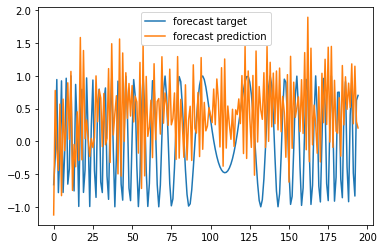

In [17]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

LSTM

In [19]:
X=X.reshape(-1,T,1)

i=Input(shape=(T,D))
x=LSTM(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

r=model.fit(
    X[:-N//2],Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 95ms/step - loss: 0.5394 - val_loss: 0.4762
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5195 - val_loss: 0.4986
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5049 - val_loss: 0.5218
Epoch 4/200
7/7 [==============================] - 0s 21ms/step - loss: 0.5020 - val_loss: 0.5303
Epoch 5/200
7/7 [==============================] - 0s 24ms/step - loss: 0.4906 - val_loss: 0.5319
Epoch 6/200
7/7 [==============================] - 0s 27ms/step - loss: 0.4814 - val_loss: 0.5424
Epoch 7/200
7/7 [==============================] - 0s 22ms/step - loss: 0.4656 - val_loss: 0.5272
Epoch 8/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4569 - val_loss: 0.5198
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4343 - val_loss: 0.5228
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3934 - val_loss: 0.5148
Epoch 11/200
7/7 [=============

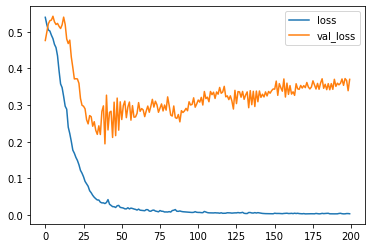

In [20]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


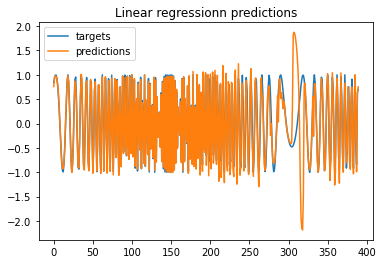

In [21]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title('Linear regressionn predictions')
plt.legend()
plt.show()

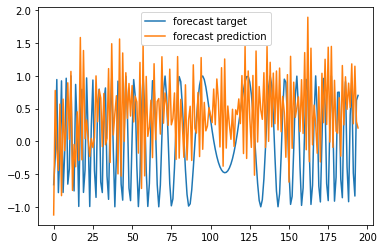

In [22]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()